In [1]:
import tensorflow as tf
print(tf.__version__)



2.3.1


In [2]:
# !pip install tensorflow==2.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline



# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization


In [4]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [5]:
xtrain.shape

(60000, 28, 28)

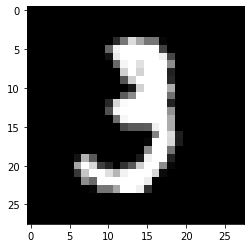

In [8]:
plt.imshow(xtrain[10,:,:],cmap='gray')

In [11]:
ytrain[10]

3

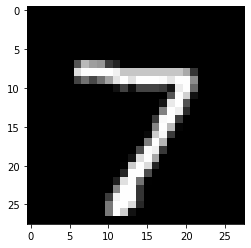

In [10]:
plt.imshow(xtest[0,:,:],cmap='gray')

In [13]:
ytest[0]

7

In [14]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [15]:
#Represent Training & Testing samples suitable for #tensorflow backend
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')


In [16]:
x_test.shape

(10000, 784)

In [17]:
x_train/=255
x_test/=255

In [18]:
from tensorflow import keras

y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [29]:
# Initialize the constructor
model = Sequential()

# Define model architecture
model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
epochs = 30
batch_size = 20000


history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)
loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)

Epoch 1/30
3/3 [==============================] - 2s 542ms/step - loss: 0.2370 - accuracy: 0.9328 - val_loss: 0.1828 - val_accuracy: 0.9488
Epoch 2/30
3/3 [==============================] - 1s 474ms/step - loss: 0.2233 - accuracy: 0.9367 - val_loss: 0.1749 - val_accuracy: 0.9513
Epoch 3/30
3/3 [==============================] - 1s 454ms/step - loss: 0.2105 - accuracy: 0.9399 - val_loss: 0.1641 - val_accuracy: 0.9552
Epoch 4/30
3/3 [==============================] - 1s 466ms/step - loss: 0.1985 - accuracy: 0.9431 - val_loss: 0.1582 - val_accuracy: 0.9560
Epoch 5/30
3/3 [==============================] - 1s 458ms/step - loss: 0.1884 - accuracy: 0.9460 - val_loss: 0.1518 - val_accuracy: 0.9585
Epoch 6/30
3/3 [==============================] - 2s 503ms/step - loss: 0.1788 - accuracy: 0.9496 - val_loss: 0.1458 - val_accuracy: 0.9603
Epoch 7/30
3/3 [==============================] - 2s 507ms/step - loss: 0.1701 - accuracy: 0.9519 - val_loss: 0.1403 - val_accuracy: 0.9593
Epoch 8/30
3/3 [====

[0.9488333463668823, 0.9513333439826965, 0.9551666378974915, 0.9559999704360962, 0.9585000276565552, 0.9603333473205566, 0.9593333601951599, 0.9624999761581421, 0.9628333449363708, 0.9649999737739563, 0.9661666750907898, 0.9666666388511658, 0.9668333530426025, 0.9678333401679993, 0.968999981880188, 0.968666672706604, 0.9706666469573975, 0.9700000286102295, 0.9714999794960022, 0.9714999794960022, 0.9729999899864197, 0.9726666808128357, 0.9725000262260437, 0.9738333225250244, 0.9731666445732117, 0.9750000238418579, 0.9750000238418579, 0.9743333458900452, 0.9750000238418579, 0.9754999876022339]
[0.93279629945755, 0.9367036819458008, 0.9398703575134277, 0.943148136138916, 0.9460185170173645, 0.9496296048164368, 0.9518518447875977, 0.9541296362876892, 0.9557592868804932, 0.9584629535675049, 0.9602407217025757, 0.9620925784111023, 0.9638333320617676, 0.9655555486679077, 0.9668889045715332, 0.968407392501831, 0.9701481461524963, 0.9712222218513489, 0.9722407460212708, 0.9735925793647766, 0.97

<AxesSubplot:>

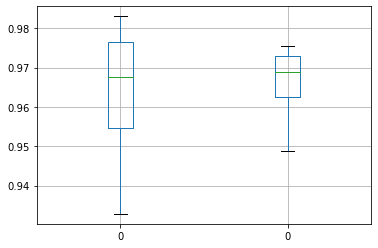

In [41]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [34]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.931
Loss: 0.236


In [35]:
y_predict = model.predict(x_test)

In [36]:
y_predict[0]

array([1.0463444e-05, 1.0581699e-08, 4.5630431e-06, 6.4628039e-05,
       3.6420175e-07, 2.5945885e-06, 1.3034289e-09, 9.9964511e-01,
       1.0129334e-06, 2.7119837e-04], dtype=float32)

In [37]:
np.argmax(y_predict[0])

7

In [38]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 959    0    0    2    0    5    7    3    4    0]
 [   0 1115    2    2    1    1    4    1    9    0]
 [   7    2  930   22   14    2    9   13   29    4]
 [   2    1   10  940    0   23    1    9   17    7]
 [   1    0    5    1  917    1   10    4    6   37]
 [   8    2    1   32    5  797   14    1   26    6]
 [  12    3    4    2   10   11  912    1    3    0]
 [   1    8   22    7    7    0    0  948    3   32]
 [   8    3    7   20   10   19   10   11  869   17]
 [   9    7    1   14   29    4    1   11    8  925]]


In [39]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.90      0.92      1032
           3       0.90      0.93      0.92      1010
           4       0.92      0.93      0.93       982
           5       0.92      0.89      0.91       892
           6       0.94      0.95      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.89      0.89      0.89       974
           9       0.90      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

